# <font color='blue'> Bayesian Network
- https://pgmpy.org/models/bayesiannetwork.html

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bayesian Network
## 1.1. Add CPD (Conditional Probability Distribution) to the Bayesian Model.

In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])
grades_cpd = TabularCPD('grades', 3, 
                        [[0.1,0.1,0.1,0.1,0.1,0.1],
                         [0.1,0.1,0.1,0.1,0.1,0.1],
                         [0.8,0.8,0.8,0.8,0.8,0.8]],
                        evidence=['diff', 'intel'], 
                        evidence_card=[2, 3])
student.add_cpds(grades_cpd)

In [3]:
grades_cpd.get_evidence()
grades_cpd.get_cardinality(['diff', 'intel'])
grades_cpd.get_values()

['intel', 'diff']

{'diff': 2, 'intel': 3}

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8]])

- evidence=['diff', 'intel'] difficulty가 먼저 나왔으니 2 by 3 아래에서 첫번째 것이 grade의 cpd

In [4]:
from itertools import product
pd.DataFrame(grades_cpd.get_values(), 
             index=['gradeA', 'gradeB', 'gradeC'],
            columns = list(product(['easy', 'hard'], ['dumb', 'avg', 'smart'])))

,"(easy, dumb)","(easy, avg)","(easy, smart)","(hard, dumb)","(hard, avg)","(hard, smart)"
gradeA,0.1,0.1,0.1,0.1,0.1,0.1
gradeB,0.1,0.1,0.1,0.1,0.1,0.1
gradeC,0.8,0.8,0.8,0.8,0.8,0.8


In [5]:
pd.DataFrame(grades_cpd.get_values(), 
             index=['gradeA', 'gradeB', 'gradeC'],
            columns = list(product(['dumb', 'avg', 'smart'], ['easy', 'hard'])))

,"(dumb, easy)","(dumb, hard)","(avg, easy)","(avg, hard)","(smart, easy)","(smart, hard)"
gradeA,0.1,0.1,0.1,0.1,0.1,0.1
gradeB,0.1,0.1,0.1,0.1,0.1,0.1
gradeC,0.8,0.8,0.8,0.8,0.8,0.8


In [6]:
level_0 = ['easy']*3 + ['hard']*3
level_1 = ['dumb', 'avg', 'smart']*2

pd.DataFrame(grades_cpd.get_values(), 
             index=['gradeA', 'gradeB', 'gradeC'],
             columns = [level_0, level_1])

easy            hard           
       dumb  avg smart dumb  avg smart
gradeA  0.1  0.1   0.1  0.1  0.1   0.1
gradeB  0.1  0.1   0.1  0.1  0.1   0.1
gradeC  0.8  0.8   0.8  0.8  0.8   0.8

In [7]:
student.nodes()
student.edges()
student.get_cpds()
len(student.get_cpds())

NodeView(('diff', 'grades', 'intel'))

OutEdgeView([('diff', 'grades'), ('intel', 'grades')])

[<TabularCPD representing P(grades:3 | diff:2, intel:3) at 0x263f03bdca0>]

1

## 1.2. Add an edge between ('grade', 'intel')

In [17]:
from pgmpy.models import BayesianNetwork
G = BayesianNetwork()
G.add_nodes_from(['grade', 'intel'])
G.add_edge('grade', 'intel')

In [18]:
G.nodes()
G.edges()
G.get_cpds()
len(G.get_cpds())

NodeView(('grade', 'intel'))

OutEdgeView([('grade', 'intel')])

[]

0

In [27]:
G.check_model()

ValueError: No CPD associated with grade

## 1.3. Estimates the CPD for each variable based on a given data set.

In [34]:
from pgmpy.estimators import MaximumLikelihoodEstimator
data = pd.DataFrame(data={'A': [0, 0, 1], 'B': [0, 1, 0], 'C': [1, 1, 0]})
data
model = BayesianNetwork([('A', 'C'), ('B', 'C')])
model.fit(data)
model.get_cpds()

,A,B,C
0,0,0,1
1,0,1,1
2,1,0,0


[<TabularCPD representing P(A:2) at 0x263fb5822b0>,
 <TabularCPD representing P(C:2 | A:2, B:2) at 0x263fb3d0580>,
 <TabularCPD representing P(B:2) at 0x263fb551d90>]

Method to update the parameters of the BayesianNetwork with more data. Internally, uses BayesianEstimator with dirichlet prior, and uses the current CPDs (along with n_prev_samples) to compute the pseudo_counts.

In [35]:
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling
model = get_example_model('alarm')
# Generate some new data.
data = BayesianModelSampling(model).forward_sample(int(1e3))
model.fit_update(data)

  0%|          | 0/37 [00:00<?, ?it/s]

## 1.4. Returns the cardinality of the node. Throws an error if the CPD for the queried node hasn’t been added to the network.

In [32]:
student = BayesianNetwork([('diff', 'grade'), ('intel', 'grade')])
cpd_diff = TabularCPD('diff', 2, [[0.6], [0.4]]);
cpd_intel = TabularCPD('intel', 2, [[0.7], [0.3]]);
cpd_grade = TabularCPD('grade', 2, [[0.1, 0.9, 0.2, 0.7],
                                    [0.9, 0.1, 0.8, 0.3]],
                                ['intel', 'diff'], [2, 2])
student.add_cpds(cpd_diff,cpd_intel,cpd_grade)
student.get_cardinality()

defaultdict(int, {'diff': 2, 'intel': 2, 'grade': 2})

In [33]:
student.get_cardinality('intel')

2

## 1.5. Predicts states of all the missing variables.

In [71]:
values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, 5)),
                      columns=['A', 'B', 'C', 'D', 'E'])
values.head()
train_data = values[:800]
train_data.head()
predict_data = values[800:]
predict_data.head()

,A,B,C,D,E
0,1,0,0,1,1
1,1,1,1,1,0
2,0,0,0,1,0
3,0,1,1,1,1
4,1,0,0,0,1


,A,B,C,D,E
0,1,0,0,1,1
1,1,1,1,1,0
2,0,0,0,1,0
3,0,1,1,1,1
4,1,0,0,0,1


,A,B,C,D,E
800,0,0,1,0,0
801,1,0,0,1,1
802,1,1,1,0,1
803,1,0,0,1,0
804,1,1,0,1,1


In [62]:
y_true = predict_data['E']
y_true

800    0
801    0
802    0
803    0
804    1
      ..
995    0
996    0
997    1
998    1
999    0
Name: E, Length: 200, dtype: int32

In [63]:
values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, 5)),
                      columns=['A', 'B', 'C', 'D', 'E'])
train_data = values[:800]
predict_data = values[800:]
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])
model.fit(train_data)
predict_data = predict_data.copy()
predict_data.drop('E', axis=1, inplace=True)
y_pred = model.predict(predict_data)
y_pred

  0%|          | 0/16 [00:00<?, ?it/s]

,E
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,1


<AxesSubplot:>

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       108
           1       0.39      0.40      0.39        92

    accuracy                           0.43       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.43      0.43      0.43       200



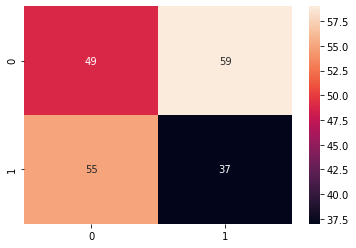

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
print(classification_report(y_true, y_pred))

In [72]:
values

,A,B,C,D,E
0,1,0,0,1,1
1,1,1,1,1,0
2,0,0,0,1,0
3,0,1,1,1,1
4,1,0,0,0,1
...,...,...,...,...,...
995,0,0,1,0,1
996,1,1,1,1,0
997,0,0,0,1,1
998,0,0,1,0,1


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(values[['A', 'B', 'C', 'D']], values['E'], test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
classifier.predict(X_test)
y_pred_dt = classifier.predict(X_test)

((800, 4), (200, 4), (800,), (200,))

DecisionTreeClassifier(max_depth=4)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1])

<AxesSubplot:>

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       108
           1       0.52      0.42      0.47        92

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.56      0.55       200



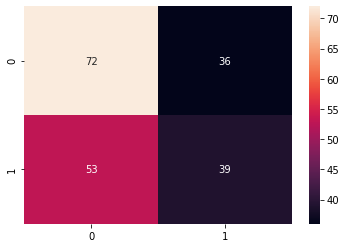

In [75]:
sns.heatmap(confusion_matrix(y_true, y_pred_dt), annot=True)
print(classification_report(y_true, y_pred_dt))

In [53]:
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])
model.fit(train_data)
predict_data = predict_data.copy()
predict_data.drop('E', axis=1, inplace=True)
y_pred = model.predict(predict_data)
y_pred

  0%|          | 0/16 [00:00<?, ?it/s]

,E
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


In [81]:
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])
model.fit(train_data)
predict_data = predict_data.copy()
predict_data.drop('B', axis=1, inplace=True)
y_pred = model.predict(predict_data)
y_pred

  0%|          | 0/16 [00:00<?, ?it/s]

,B
0,1
1,1
2,0
3,1
4,1
...,...
195,0
196,1
197,1
198,0


## 1.6. Predicts probabilities of all states of the missing variables.

In [82]:
values = pd.DataFrame(np.random.randint(low=0, high=2, size=(100, 5)),
                      columns=['A', 'B', 'C', 'D', 'E'])
train_data = values[:80]
predict_data = values[80:]
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])
model.fit(values)
predict_data = predict_data.copy()
predict_data.drop('B', axis=1, inplace=True)
y_prob = model.predict_probability(predict_data)
y_prob

,B_0,B_1
80,0.557431,0.442569
81,0.454713,0.545287
82,0.590226,0.409774
83,0.557431,0.442569
84,0.557431,0.442569
85,0.652328,0.347672
86,0.454713,0.545287
87,0.652328,0.347672
88,0.652328,0.347672
89,0.685095,0.314905


# End